# Modeling

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

pd.set_option('display.max_colwidth', None)

In [2]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [3]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post showing off my oxalis but Henk stole the show,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just this reason. It’s like a little jungle for him.,no_text,593,39723,0.98,1


In [4]:
plants.shape

(9271, 8)

In [5]:
X = plants['title']
y = plants['subreddit']

In [6]:
X.shape

(9271,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [8]:
X_train.shape

(6953,)

In [9]:
cvec = CountVectorizer(
)

In [10]:
cvec.fit(X_train)

CountVectorizer()

In [11]:
X_train_cvec = cvec.transform(X_train)

In [12]:
cvec.get_feature_names_out()

array(['00', '000', '00pm', ..., 'zuccini', 'zuchini', 'zz'], dtype=object)

In [13]:
X_train_cvec

<6953x6459 sparse matrix of type '<class 'numpy.int64'>'
	with 62426 stored elements in Compressed Sparse Row format>

In [14]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier(random_state=21))
])

In [15]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('et', ExtraTreesClassifier(random_state=21))])

In [16]:
pipe.score(X_train, y_train)

0.9953976700704732

In [17]:
pipe.score(X_test, y_test)

0.8390854184641933

In [18]:
1 - y.mean()

0.4891597454427785

In [19]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()),
  ('et', ExtraTreesClassifier(random_state=21))],
 'verbose': False,
 'cvec': CountVectorizer(),
 'et': ExtraTreesClassifier(random_state=21),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'et__bootstrap': False,
 'et__ccp_alpha': 0.0,
 'et__class_weight': None,
 'et__criterion': 'gini',
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__max_leaf_nodes': None,
 'et__max_samples': None,
 'et__min_impurity_decrease': 0.0,
 'et__min_samples_leaf': 1,
 'et__min_samples_split': 2,
 'et__min_weight_fra

In [20]:
pipe_params = {
    'cvec__max_features': [None],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.9, 1.0],
    'cvec__ngram_range': [(1,1), (1, 2)],
    'cvec__stop_words': [None, 'english'],
    'et__n_estimators': [100, 500],
    'et__max_features': ['sqrt'],
    'et__max_depth': [None],
    'et__min_samples_leaf': [1],
    'et__bootstrap': [True],
    'et__oob_score': [True]
}

In [21]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5,
                  n_jobs=8
)

In [22]:
%%time
gs.fit(X_train, y_train)

CPU times: user 48.3 s, sys: 27.9 s, total: 1min 16s
Wall time: 14min 29s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('et',
                                        ExtraTreesClassifier(random_state=21))]),
             n_jobs=8,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__max_features': [None],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'et__bootstrap': [True], 'et__max_depth': [None],
                         'et__max_features': ['sqrt'],
                         'et__min_samples_leaf': [1],
                         'et__n_estimators': [100, 500],
                         'et__oob_score': [True]})

In [23]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'et__bootstrap': True,
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__min_samples_leaf': 1,
 'et__n_estimators': 500,
 'et__oob_score': True}

In [24]:
gs.score(X_train, y_train)

0.9902200488997555

In [25]:
gs.score(X_test, y_test)

0.8308886971527178

In [26]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

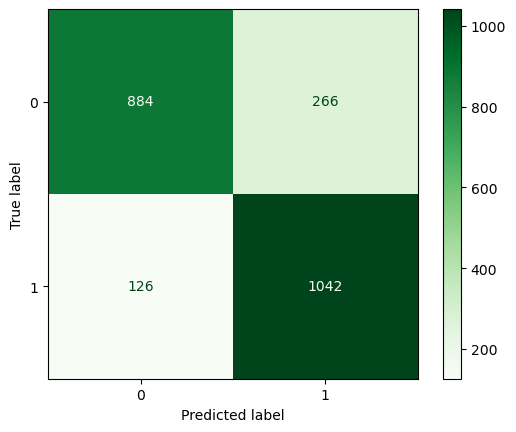

In [27]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Greens');

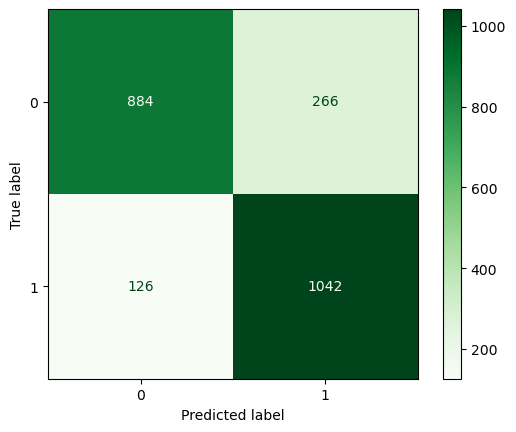

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Greens');

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.87525   0.76870   0.81852      1150
           1    0.79664   0.89212   0.84168      1168

    accuracy                        0.83089      2318
   macro avg    0.83594   0.83041   0.83010      2318
weighted avg    0.83564   0.83089   0.83019      2318



In [30]:
misclassified_indices = (preds != y_test)

In [31]:
misclassified_indices

5799    False
3599    False
4819    False
966     False
448     False
        ...  
4215    False
4852     True
4618    False
1474    False
6695     True
Name: subreddit, Length: 2318, dtype: bool

In [32]:
misclassified_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_indices],
    'True Labels': y_test[misclassified_indices],
    'Predicted_Labels': preds[misclassified_indices]
})

In [33]:
misclassified_df.head(50)

,Misclassified_Posts,True Labels,Predicted_Labels
6600,so proud of my babies...,0,1
8203,Chunky potting mix,0,1
6894,Advice: Whether to allow this ivy to grow?,0,1
5622,ain’t stupid if it works,0,1
2378,Stromanthe is popping with colour 😍,1,0
5030,Thought this sub would appreciate this post,0,1
5202,Before and after. Really proud.,0,1
6682,"I just started to learn to prune, how is it ? Any thoughts on improvements?",0,1
2087,Got this giant for £40,1,0
5713,Social distancing in my safe room.,0,1
